# ANALYSIS OF BOL_1

In [1]:
import re
import os
import glob
import linecache
import itertools
import shutil
from pprint import pprint

import pandas as pd
import matplotlib as mt
from matplotlib import pyplot as plt
from matplotlib import pylab as pl
import numpy as np
import scipy.stats as stats

from rdkit import Chem
import rdkit.Chem.Recap as Recap
from rdkit.Chem import AllChem

from pymol import cmd

import mmtf

In [2]:
os.chdir('/home/angel/Documents/angel/experiments/Adenine_targets_RUG/RUN_1/RESULTS/Docking/')
files=[]
names =[]
scores=[]
mass=[]
formula=[]
smiles=[]
model=[]
het_atoms=[] 
rescoring=[]
for file in glob.glob("*.mol2"):
    try:
        with open(file,'rt') as f:
            modes=[]
            for i, line in enumerate(f):
                if 'Gold.Score' in line:
                    score=float(linecache.getline(file,i+3).strip().split(' ')[0])
                    modes.append (score)

            if max(modes) >=0:
                files.append (file.split('.')[0])
                scores.append(max(modes))
    except Exception:
        pass
d={ 'file':pd.Series(files),
    'score':pd.Series(scores)}
table=pd.DataFrame (d)
sort =table.sort_values ('score',ascending=False)
sort = sort.reset_index(drop=True)

In [3]:
sort.head()

,file,score
0,5VSM_5AD_259,71.82
1,2ZBV_ADN_783,71.11
2,2OGX_ATP_515,69.63
3,2V7U_SAM_873,69.37
4,3NM6_A_229,69.20


In [4]:
len (sort)

11688

In [5]:
sort.to_csv ('../../DATA/Analysis/all_scores.csv')

In [6]:
h=list(sort ['score'])
h.sort()
hmean = np.mean(h)
hstd = np.std(h)

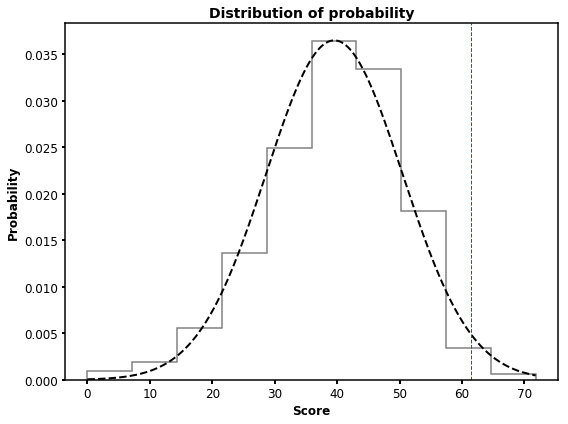

In [7]:
plt.rcParams['axes.linewidth'] = 1.5
pdf = stats.norm.pdf(h, hmean, hstd)
plt.figure(figsize=(8,6))

plt.plot(h,pdf,'k--',linewidth=2.0)
plt.hist(h,density=True,histtype='step',color='gray',linewidth=1.5)
plt.title ('Distribution of probability',fontsize=14,fontweight='bold',family='sans-serif')
plt.xlabel ('Score',fontsize=12,fontweight='bold')
plt.ylabel ('Probability',fontsize=12,fontweight='bold')
plt.tick_params ('both',width=2,labelsize=12)
plt.axvline(x=hmean+(2*hstd),color='r',linewidth=1,linestyle='--',)
plt.tight_layout()
plt.show()

In [8]:
best=[]
worst=[]
for score in h:
    if score > hmean + (2*hstd):
        best.append(score)
    else:
        worst.append (score)

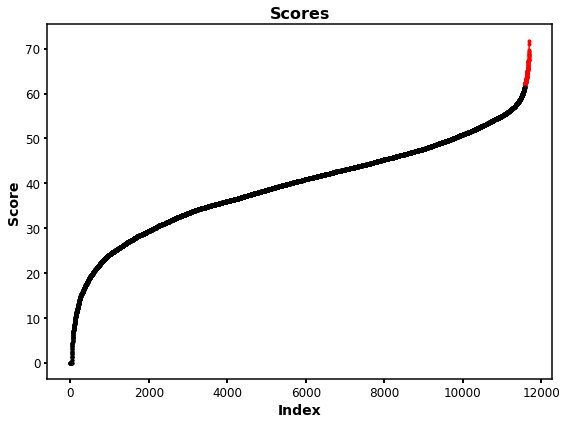

In [9]:
o=np.array (range(len(best)))

plt.figure(figsize=(8,6))
plt.plot (o+len(worst),list(best),marker='.', color='red')
plt.plot (range(len(worst)),list(worst),marker='.', color='black')
plt.title ('Scores',fontsize=16,fontweight='bold',family='sans-serif')
plt.xlabel ('Index',fontsize=14,fontweight='bold')
plt.ylabel ('Score',fontsize=14,fontweight='bold')
plt.tick_params ('both',width=2,labelsize=12)
plt.tight_layout()
plt.show()

In [10]:
candidates=[]
for i in range(len(best)):
    candidates.append ((sort.at [i,'file'], sort.at [i,'score']))

In [11]:
targets=[]
for i in range(len(best)):
    targets.append (sort.at [i,'file'])

In [12]:
p_folder='../Proteins/'
l_folder='../Docking/'
c_folder='../../DATA/Complexes/'

In [ ]:
for tar in targets:
    print (tar)
    cmd.load (l_folder+tar+'.mol2',object='lig',state=0,finish=1)
    cmd.select ('dummy', 'not name C,H,O,N,P,S')
    cmd.remove('dummy')
    cmd.load (p_folder+tar.split('_')[0]+'.mol2',object='prot')
    cmd.select ('enabled')
    cmd.save(filename=c_folder+tar+'.pdb',selection='sele', state=-1,format='pdb')
    cmd.deselect()
    cmd.delete('all')
    ### Cavity isolation from pymol, ligand and 8 Armstrong residues around ###
    #cmd.select ('lig')
    #cmd.select ('sele expand 8')
    #cmd.select ('byres sele')
    #cmd.save(filename=pocket_folder+tar+'.pdb',selection='sele', state=-1,format='pdb')

In [14]:
for tar in targets:
    print (tar+'.pdb\t','<1>')

5VSM_5AD_259.pdb	 <1>
2ZBV_ADN_783.pdb	 <1>
2OGX_ATP_515.pdb	 <1>
2V7U_SAM_873.pdb	 <1>
3NM6_A_229.pdb	 <1>
4YVG_SAM_239.pdb	 <1>
4IG6_SAH_223.pdb	 <1>
1UAM_SAH_250.pdb	 <1>
2ZBV_ADN_781.pdb	 <1>
6H8H_ATP_515.pdb	 <1>
4OJT_A_232.pdb	 <1>
6F3N_ADN_1842.pdb	 <1>
2ZJ0_2FA_1943.pdb	 <1>
3CE6_ADN_1941.pdb	 <1>
2V7T_SAH_873.pdb	 <1>
6F3Q_A_1842.pdb	 <1>
3OND_ADN_981.pdb	 <1>
2CBX_CC5_881.pdb	 <1>
3OND_ADN_977.pdb	 <1>
3G5S_FAD_424.pdb	 <1>
6F3P_3AD_921.pdb	 <1>
2C5H_3D1_876.pdb	 <1>
2CC2_5AD_867.pdb	 <1>
4FHF_EEM_339.pdb	 <1>
1RQP_SAM_875.pdb	 <1>
2C2W_5CD_875.pdb	 <1>
3ONF_3AD_974.pdb	 <1>
3ONE_A_981.pdb	 <1>
6CK0_F5D_209.pdb	 <1>
5WP5_SAH_464.pdb	 <1>
5M67_A_1870.pdb	 <1>
1Z5O_MTA_468.pdb	 <1>
4F1W_A_475.pdb	 <1>
2CC2_5AD_868.pdb	 <1>
4RH1_EEM_341.pdb	 <1>
1UAL_SAH_243.pdb	 <1>
3ONE_A_977.pdb	 <1>
4LVC_ADN_1872.pdb	 <1>
6EXI_ADN_1876.pdb	 <1>
3GLQ_RAB_925.pdb	 <1>
2ZJ1_ARJ_1940.pdb	 <1>
1Z5N_A_469.pdb	 <1>
5AXA_ADN_860.pdb	 <1>
1UAK_SAM_243.pdb	 <1>
4NDQ_ATP_518.pdb	 <1>
1D4F_ADN_1721.pdb	

In [15]:
len (targets)

118

## Cavity Analysis

In [16]:
cavities='/home/angel/Documents/angel/experiments/Adenine_targets_RUG/RUN_1/DATA/Pockets/dpout_explicitp.txt'

In [17]:
lines_list = open(cavities).read().splitlines()

In [18]:
results=[]
for line in lines_list:
    line=line.split (' ')
    while '' in line:
        line.remove('')
    results.append (line)    
table=pd.DataFrame(data=results[1:],columns=results[0])

In [19]:
table.head ()

,pdb,lig,overlap,PP-crit,PP-dst,crit4,crit5,crit6,crit6_continue,lig_vol,...,LEU,LYS,MET,PHE,PRO,SER,THR,TRP,TYR,VAL
0,5VSM_5AD_259.pdb,<1>,100.00,1,0.00,1.00,1.00,1,2.00,148.95,...,1,0,2,3,0,2,0,0,2,2
1,2ZBV_ADN_783.pdb,<1>,100.00,1,0.00,1.00,1.00,1,2.00,172.34,...,1,0,0,4,0,0,1,1,2,3
2,2OGX_ATP_515.pdb,<1>,100.00,1,0.00,1.00,1.00,1,2.00,180.33,...,4,0,1,0,4,2,2,0,1,2
3,2V7U_SAM_873.pdb,<1>,100.00,1,0.00,1.00,1.00,1,2.00,156.92,...,1,0,0,3,1,2,3,2,3,0
4,3NM6_A_229.pdb,<1>,100.00,1,0.00,1.00,1.00,1,2.00,176.34,...,0,0,2,2,0,1,0,0,0,3


In [20]:
table.to_csv ('../../DATA/Analysis/table_cavities_explicit.csv')

## Binding pocket analysis

In [21]:
source='/home/angel/Documents/angel/experiments/Adenine_targets_RUG/RUN_1/DATA/Pockets/'
analysis='/home/angel/Documents/angel/experiments/Adenine_targets_RUG/RUN_1/DATA/Analysis/'

for folder in os.listdir(source):
    try:
        for file in os.listdir (source+folder):
            if 'info.txt' in file:
                shutil.copyfile (source+folder+'/'+file,analysis+file)
    except Exception:
        pass

In [22]:
os.chdir(analysis)
name=[]
drug_score=[]
t_sasa=[]
p_sasa=[]
a_sasa=[]
volume=[]
mlhd=[]
hydro_score=[]
vol_score=[]
pol_score=[]
charge_score=[]
ppa=[]

for file in glob.glob("*info.txt"):
    try:
        with open(file,'rt') as f:
            name.append(file.split('.')[0])
            for i, line in enumerate(f):
                if 'Pocket 1 :' in line:
                    drug_score.append (float(linecache.getline (file,3).strip().split('\t')[1]))
                    t_sasa.append (float(linecache.getline (file,5).strip().split('\t')[1]))
                    p_sasa.append (float(linecache.getline (file,6).strip().split('\t')[1]))
                    a_sasa.append (float(linecache.getline (file,7).strip().split('\t')[1]))
                    volume.append (float(linecache.getline (file,8).strip().split('\t')[1]))
                    mlhd.append (float(linecache.getline (file,9).strip().split('\t')[1]))
                    hydro_score.append (float(linecache.getline (file,13).strip().split('\t')[1]))
                    vol_score.append (float(linecache.getline (file,14).strip().split('\t')[1]))
                    pol_score.append (float(linecache.getline (file,15).strip().split('\t')[1]))
                    charge_score.append (float(linecache.getline (file,16).strip().split('\t')[1]))
                    ppa.append (float(linecache.getline (file,17).strip().split('\t')[1]))

    except Exception:
        pass
data={'Name':pd.Series(name),
      'Druggability Score':pd.Series(drug_score),
      'Total SASA':pd.Series(t_sasa),
      'Polar SASA':pd.Series(p_sasa),
      'Apolar SASA':pd.Series(a_sasa),
      'Volume':pd.Series(volume),
      'Mean local hydrophobic density':pd.Series(mlhd),
      'Hydrophobicity score':pd.Series(hydro_score),
      'Volume score':pd.Series(vol_score),
      'Polarity score':pd.Series(pol_score),
      'Charge score':pd.Series(charge_score),
      'Proportion of polar atoms':pd.Series(ppa)}

cav=pd.DataFrame (data)
cavities=cav.set_index (cav['Name'])
cavities=cavities.drop (columns='Name')

In [23]:
cavities.head()

,Druggability Score,Total SASA,Polar SASA,Apolar SASA,Volume,Mean local hydrophobic density,Hydrophobicity score,Volume score,Polarity score,Charge score,Proportion of polar atoms
Name,,,,,,,,,,,
3MMS_Q88_225_info,0.824,84.877,11.786,73.091,583.047,46.706,23.800,3.450,9.0,-5.0,32.653
5M67_A_1870_info,0.045,1293.300,574.938,718.361,5044.640,32.102,20.216,4.009,67.0,-3.0,43.197
1WU8_ADN_770_info,0.625,50.707,19.308,31.398,438.757,42.755,26.300,4.250,11.0,1.0,35.185
4RH0_EEM_340_info,0.297,85.230,36.629,48.602,435.375,31.824,28.111,3.833,10.0,1.0,32.432
3RUX_BS5_265_info,0.520,166.171,64.730,101.441,921.861,28.537,20.393,3.536,13.0,3.0,50.000


In [24]:
cavities.to_csv ('../Analysis/cavities_descriptors.csv')

## PCA analysis

In [25]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [26]:
cavities_std = cavities.loc[:, cavities.columns].values
cavities_std = StandardScaler().fit_transform(cavities_std)

In [27]:
pca = PCA(n_components=2)
pca.fit(cavities_std)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [28]:
cavities_2d = pca.transform(cavities_std)

In [29]:
cavities_pca= pd.DataFrame(cavities_2d)
cavities_pca.index = cavities.index
cavities_pca.columns = ['PC1','PC2']
cavities_pca.head()

,PC1,PC2
Name,,
3MMS_Q88_225_info,-1.251379,1.840948
5M67_A_1870_info,5.007042,-0.051211
1WU8_ADN_770_info,-1.584654,1.437640
4RH0_EEM_340_info,-1.522216,0.687307
3RUX_BS5_265_info,-0.532007,-1.190027


In [30]:
print(pca.explained_variance_ratio_) 

[0.45926911 0.19748986]


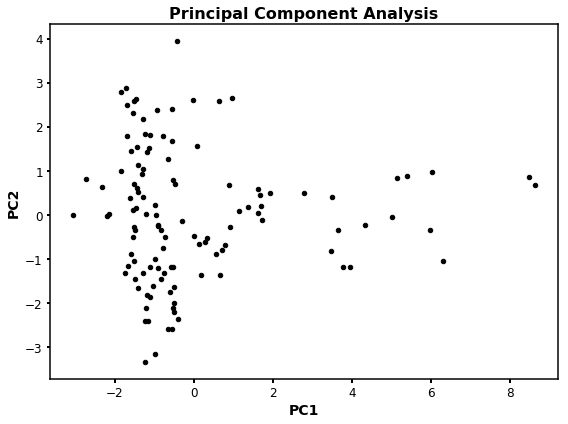

In [31]:
ax = cavities_pca.plot(kind='scatter', x='PC1', y='PC2', figsize=(8,6),color='k',marker='o')
plt.title ('Principal Component Analysis',fontsize=16,fontweight='bold',family='sans-serif')
plt.xlabel ('PC1',fontsize=14,fontweight='bold')
plt.ylabel ('PC2',fontsize=14,fontweight='bold')
plt.tick_params ('both',width=2,labelsize=12)

#for i, name in enumerate(cavities_pca.index):
#    ax.annotate(name, (cavities_pca.iloc[i].PC2, cavities_pca.iloc[i].PC1),color='k')

plt.tight_layout()
plt.show()

## Definition of best number of clusters by silhouette analysis

In [32]:
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans

For n_clusters = 2 The average silhouette_score is : 0.5986566308779165
For n_clusters = 3 The average silhouette_score is : 0.4484126817264536
For n_clusters = 4 The average silhouette_score is : 0.45467180769423976
For n_clusters = 5 The average silhouette_score is : 0.4533042931682217
For n_clusters = 6 The average silhouette_score is : 0.44670997954496705
For n_clusters = 7 The average silhouette_score is : 0.441905494683239


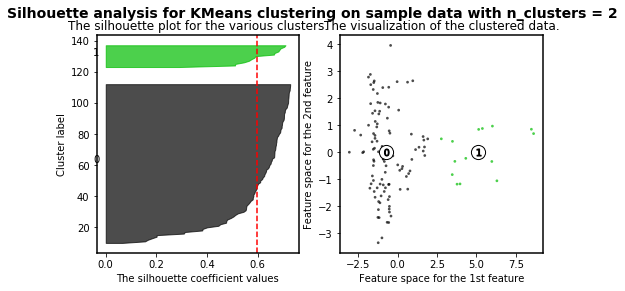

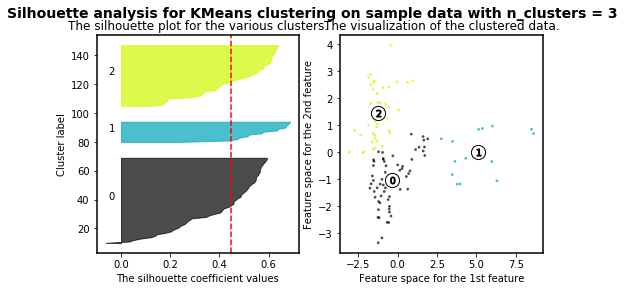

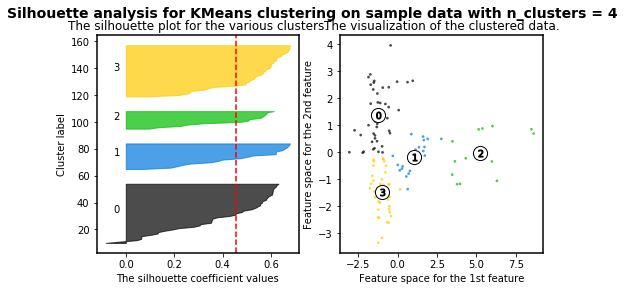

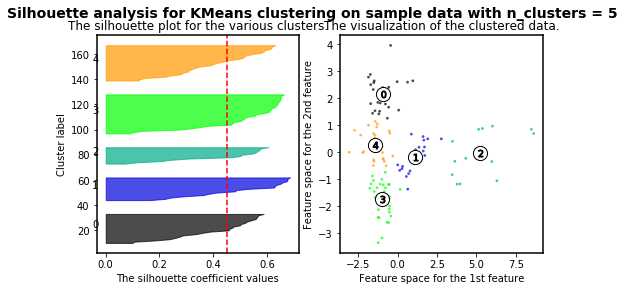

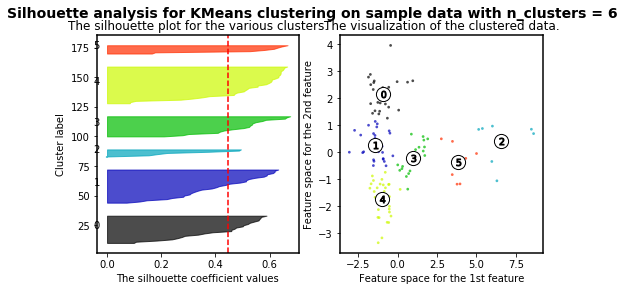

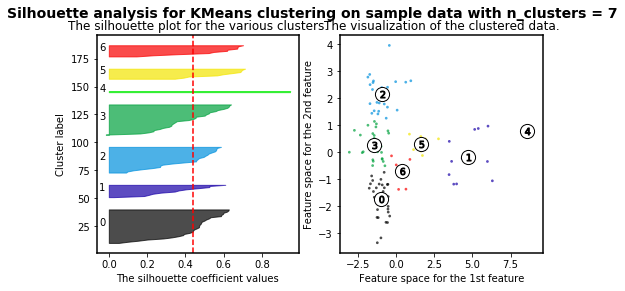

In [33]:
range_n_clusters = [2, 3, 4, 5, 6, 7]
for n_clusters in range_n_clusters:
    fig, (ax1,ax2)= plt.subplots(1, 2)
    fig.set_size_inches(8, 4)
    
    kmeans = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = kmeans.fit_predict(cavities_pca)
    silhouette_avg = silhouette_score(cavities_pca, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    
    sample_silhouette_values = silhouette_samples(cavities_pca, cluster_labels)

    y_lower = 10
    
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")


    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(cavities_pca['PC1'], cavities_pca['PC2'], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')


    # Labeling the clusters
    centers = kmeans.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

## Selecting the number of clusters based on silhouette analysis

### Selected number of clusters: 4

In [34]:
kmeans = KMeans(n_clusters=4, random_state=10)
clusters = kmeans.fit(cavities_pca)

In [35]:
cavities_pca['Cluster'] = pd.Series(clusters.labels_, index=cavities.index)

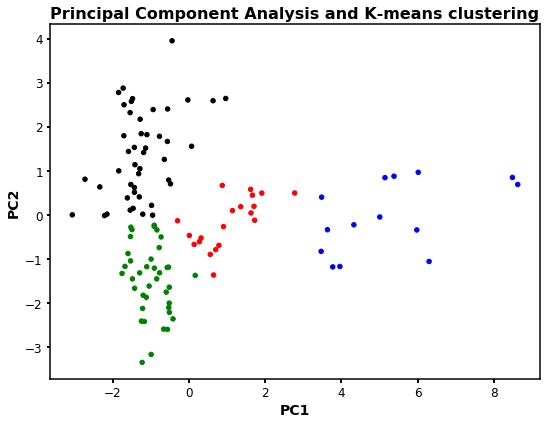

In [37]:
color_code={ 0:        'k',\
             1.0:   'r',\
             2.0:      'b',\
             3.0:           'g',\
             4.0:        'o',\
             5.0:        'p',\
             }

axk =cavities_pca.plot(
    kind='scatter',
    x='PC1',y='PC2',
    c=[color_code[i] for i in cavities_pca.Cluster.astype(np.float)], 
    marker='o',
    figsize=(8,6))

plt.title ('Principal Component Analysis and K-means clustering',fontsize=16,fontweight='bold',family='sans-serif')
plt.xlabel ('PC1',fontsize=14,fontweight='bold')
plt.ylabel ('PC2',fontsize=14,fontweight='bold')
plt.tick_params ('both',width=2,labelsize=12)

#for i,name in enumerate (cavities_pca.index):
#   axk.annotate(name,(cavities_pca.iloc[i].PC1,cavities_pca.iloc[i].PC2),annotation_clip=True)

plt.tight_layout()
plt.show()

In [38]:
add_scores=[]
for pdb_code in list(cavities_pca.index):
    for name,score in candidates:
        if name+'_info' == pdb_code:
            add_scores.append (score)

In [39]:
cavities_pca['Score'] = pd.Series(add_scores, index=cavities.index)

In [40]:
pdb_id=[]
title=[]
classification=[]
sequence=[]
method=[]
resolution=[]
date=[]
for pdb_code in list(cavities_pca.index):
    data=mmtf.fetch (pdb_code.split('_')[0])
    pdb_id.append (data.structure_id)
    title.append (data.title)
    classification.append (data.entity_list[0]['description'])
    sequence.append (data.entity_list[0]['sequence'])
    method.append (data.experimental_methods[0])
    resolution.append (data.resolution)
    date.append (data.release_date)

cavities_pca['PDB_id'] = pd.Series(pdb_id, index=cavities.index)
cavities_pca['Classification'] = pd.Series(classification, index=cavities.index)
cavities_pca['Title'] = pd.Series(title, index=cavities.index)
cavities_pca['Sequence'] = pd.Series(sequence, index=cavities.index)
cavities_pca['Method'] = pd.Series(method, index=cavities.index)
cavities_pca['Resolution'] = pd.Series(resolution, index=cavities.index)
cavities_pca['Release_date'] = pd.Series(date, index=cavities.index)


In [41]:
cavities_pca

,PC1,PC2,Cluster,Score,PDB_id,Classification,Title,Sequence,Method,Resolution,Release_date
Name,,,,,,,,,,,
3MMS_Q88_225_info,-1.251379,1.840948,0,62.79,3MMS,5'-methylthioadenosine / S-adenosylhomocystein...,Crystal structure of Streptococcus pneumoniae ...,MKIGIIAAMPEELAYLVQHLDNAQEQVVLGNTYHTGTIVSHEVVLV...,X-RAY DIFFRACTION,1.600,2010-05-12
5M67_A_1870_info,5.007042,-0.051211,2,66.26,5M67,Adenosylhomocysteinase,Crystal structure of S-adenosyl-L-homocysteine...,GIDPFTMNAKPGFTDYIVKDIALADFGRKEISLAETEMPGLMATRE...,X-RAY DIFFRACTION,1.540,2017-05-10
1WU8_ADN_770_info,-1.584654,1.437640,0,61.81,1WU8,hypothetical protein PH0463,Crystal structure of project PH0463 from Pyroc...,MITLTTDFGLKGPYVGEMKVAMLRINPNAKIVDVTHSVTRHSILEG...,X-RAY DIFFRACTION,2.600,2005-11-29
4RH0_EEM_340_info,-1.522216,0.687307,0,63.17,4RH0,Spore photoproduct lyase,Spore photoproduct lyase C140A/S76C mutant wit...,MKHHHHHHPMSDYDIPTTENLYFQGAMGKPFVPKLVYFEPEALSYP...,X-RAY DIFFRACTION,2.100,2014-10-22
3RUX_BS5_265_info,-0.532007,-1.190027,3,61.83,3RUX,BirA bifunctional protein,Crystal structure of biotin-protein ligase Bir...,GSHMVTDRDRLRPPLDERSLRDQLIGAGSGWRQLDVVAQTGSTNAD...,X-RAY DIFFRACTION,1.700,2011-12-14
3GLQ_RAB_925_info,3.468888,-0.831591,2,65.64,3GLQ,Adenosylhomocysteinase,Crystal structure of S-adenosyl-L-homocysteine...,MAHHHHHHMGTLEAQTQGPGSMNAAVIDSHSAQDYVVADIALAGWG...,X-RAY DIFFRACTION,2.300,2009-03-24
4RH1_EEM_341_info,-0.771504,1.781983,0,65.80,4RH1,Spore photoproduct lyase,Spore photoproduct lyase C140A/S76C mutant wit...,MKHHHHHHPMSDYDIPTTENLYFQGAMGKPFVPKLVYFEPEALSYP...,X-RAY DIFFRACTION,2.600,2014-10-22
5HM8_ADN_1975_info,0.906503,-0.269358,1,62.45,5HM8,Adenosylhomocysteinase,2.85 Angstrom Crystal Structure of S-adenosylh...,SNAYKMESRIKDISLAEFGLQDMEIAKTDMMGLVELQRKYRDSKPL...,X-RAY DIFFRACTION,2.850,2016-01-27
5AXC_ARJ_862_info,0.646759,-1.369132,1,64.90,5AXC,Adenosylhomocysteinase,Crystal structure of mouse SAHH complexed with...,MSDKLPYKVADIGLAAWGRKALDIAENEMPGLMRMREMYSASKPLK...,X-RAY DIFFRACTION,1.550,2016-07-27


In [42]:
cavities_pca.to_csv ('../Analysis/cavities_PCA_data.csv')